# Laboratorium 2
## Interpolacja

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.interpolate as scp

Zaimportujmy najważniejsze biblioteki:
* numpy - do funkcji i stałych matematycznych(cos, sin, pi), Array do przechowywania danych, linspace to wyznaczania równoodleglych punktów, vander do utworzenia macierzy vandermonde'a oraz z pakietu linalg funkcję solve do rozwiązania układu równań, dzięki któremu otrzymamy współczynniki wielomianu
* matplotlib - do rysowania wykresów 
* moduł interpolate z biblioteki scipy - zadanie 3, do interpolacji funkcjami sześciennymi wykorzystamy CubicSpline

# Zadanie 1

### $ f(x)=\frac{1}{1+x^2} $  

n = 5, 10, 15 - stopnie wielomianu interpolacyjnego

[-5, 5] - przedział na którym przybliżamy f - wybieramy n+1 równoodległych punktów

#### a) narysuj f i wielomian interpolacyjny
#### b) wylicz i narysuje reszty interpolacji w 30 równoodległych punktach

In [2]:
def poly(A, x):
    res = 0
    pt = 1
    for i in A:
        res += i * pt
        pt *= x
    return res

Funckja poly - zwraca wartość wielomianu w punkcie, dla wspólczynników wielomianu zadanych w A, idących od najmniejszej potęgi

In [3]:
def f(x):
    return 1/(1+x**2)

Funkcja f - wylicza wartość funkcji f w punkcie x

In [4]:
def solve(X, f):
    Y = f(X)
    V = np.vander(X, increasing=True)
    A = np.linalg.solve(V, np.transpose(Y))
    return A

Funkcja solve - zwraca nam współczynniki wielomianu interpolacyjnego, dla zadanego wektora X i funkcji f, korzystając z funkcji vander - otrzymujemy macierz Vandermonde'a i funkcji służącej do rozwiązywania układów liniowych - do rozwiązania układu równań V*A=Y, gdzie A jest wektorem niewiadomych.

In [5]:
def draw(A, f, n=1000):
    def val(x): return poly(A, x)
    X = np.linspace(-5, 5, n)
    exY = f(X)
    apY = val(X)
    plt.plot(X, exY, 'r')
    plt.plot(X, apY, 'g')
    plt.show()

Funkcja draw - rysuje nam na jednym wykresie funkcję interpolowaną (kolor czerwony) i interpolacyjną (kolor zielony)

In [6]:
def all(n, f):
    for i in n:
        A = solve(np.linspace(-5, 5, i + 1), f)
        draw(A, f)

Funkcja all - wyznacza funkcję interpolacyjną (solve), i rysuje oba wykresy(draw), dla wszystkich wartości n z listy

In [7]:
def rest(X, f, n=29):
    eps = []
    A = solve(X, f)
    def val(x): return poly(A, x)
    X = np.linspace(-5, 5, 1000)
    for i in X:
        eps.append(f(i) - val(i))

    plt.plot(X, eps)
    plt.show()

Funkcja rest - wyznacza i zaznacza na wykresie reszty(w zależności od x), będące różnicą między funkcją interpolowaną, a interpolacyjną

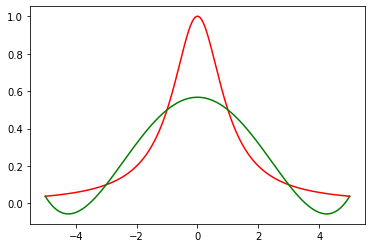

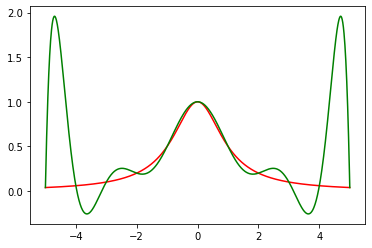

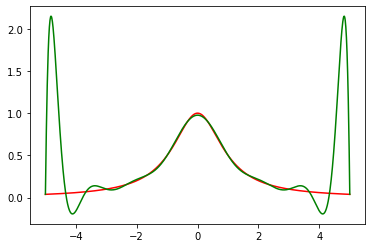

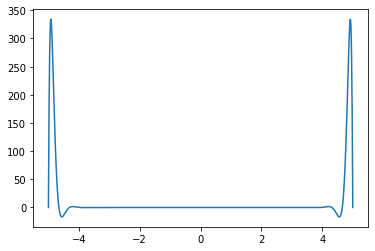

In [8]:
n=[5,10,15]
all(n, f)
rest(np.linspace(-5, 5, 29+1), f, 29)

Jak widać na wykresach, powyższa metoda i wybór punktów gwarantuje dużą dokładność "w środku" przedziału, lecz im bliżej brzegu tym mniej dokładny staje się wynik. Jest to tak zwany efekt Rungego, czyli pogorszenie się jakości interpolacji wraz ze wzrostem liczby węzłów(na początku, dla małej liczy węzłów się poprawia, dopiero później pogarsza) - typowy dla wyboru węzłów równoodległych.

# Zadanie 2

Dane takie jak w zadaniu 1, z ustaleniem n=15 i punktach będących węzłami Czebyszewa

### $ x_k=\frac{a+b}{2}+\frac{b-a}{2}*cos(\frac{2k-1}{2n}*\pi) $
gdzie k=1..n, a a i b to to końce przedziału

In [9]:
def czebysolve(n=15):
    X = []
    for i in range(1, n + 1):
        X.append(5 * np.cos((2 * i - 1) / (2*n) * np.pi))
    A = solve(np.asarray(X), f)
    draw(A, f)

Funkcja czebysolve - wyznacza funkcję interpolacyjną oraz ją rysuje w porównaniu do intepolowanej, wykorzystuje do tego napisane wcześniej funkcje

In [10]:
def czebyrest(n=30):
    X = []
    for i in range(1, n + 1):
        X.append(5 * np.cos((2 * i - 1) / (2*n) * np.pi))
    rest(np.asarray(X), f, n)

Funkcja czebyrest - wyznacza reszty interpolacyjne, będące róznicą między funkcją interpolowaną a inerpolacyjna

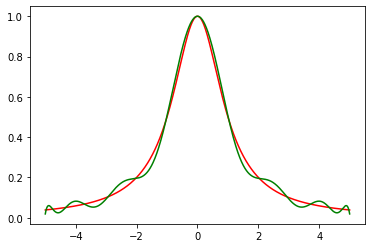

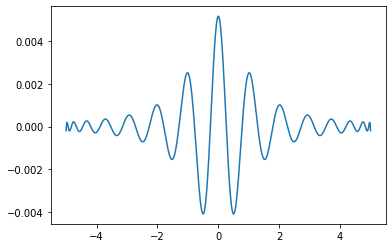

In [11]:
czebysolve()
czebyrest()

Jak widać na wykresach, powyższa metoda wyboru węzłów dużo lepiej przybliża funkcję interpolowaną, szczególnie na brzegach przedziału, mimo pozostania przy tej samej metodzie wyliczania funkcji interpolacyjnej.

Dzieje się tak ponieważ, zmieniliśmy sposób wyznaczania węzłów, z równoodległych punktów na punkty wyznaczone wzorem Czebyszewa. Charakteryzuje się on zwiększeniem gęstości węzłów na brzegach, które były największym problemem poprzedniego podejścia.

# Zadanie 3

Mając danę elipsę:

#### $ \begin{cases}
x=a*cos(t)\\
y=b*sin(t)
\end{cases}$

gdzie $ t\in[0, 2\pi] $

Wykonać interpolację sześciennymi funkcjami sklejanymi dla 10 równoodległych punktów $(t_i, x_i)$ oraz $(t_i, y_i)$, następnei narysuj przybliżenie powyższej elipsy używając wyznaczonych funkcji dla 30 punktów

In [12]:
def X(a, t):
    return a*np.cos(t)

def Y(b, t):
    return b*np.sin(t)

Definiujemy funkcje, pozwalające wyliczyć wartość X i Y w zależności od parametrów a, b i t

In [13]:
def eli(a, b, n):
    T = np.linspace(0, 2*np.pi, n)
    T[-1]=0
    exX = X(a, T)
    exY = Y(b, T)
    T[-1]=2*np.pi
    return scp.CubicSpline(T, exX, bc_type='periodic'), scp.CubicSpline(T, exY, bc_type='periodic')

Funkcja eli - wylicza wielomian interpolujący, osobno dla x i y względem parametru T.

Występuje błąd przybliżenia i np.sin(2*np.pi)!=0!=np.sin(0), więc aby móc wykorzystać CubicSpline z opcją periodic, ręcznie ustawiam ostatnią wartość, aby się zgadzało(podejrzewam, że wina jupyter notebooka, bo w pycharmie nie musiałem tak robić), funkcje trygonometryczne mają okres $ 2\pi $, więc mogę tak zrobić.

In [14]:
def draweli(CSX, CSY, a, b, n):
    stp = np.linspace(0, 2*np.pi, n)
    plt.clf()
    plt.plot(X(a, stp), Y(b, stp), 'g')
    plt.plot(CSX(stp), CSY(stp), 'r')
    plt.show()

Funkcja draweli - wyrysowuje otrzymane wielomiany na wykresie(czerwony) i docelową elipsę(zielony)

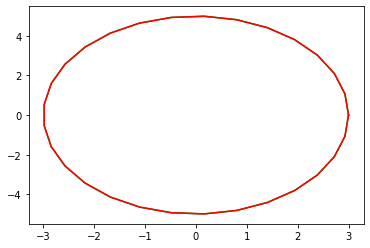

In [15]:
a=3
b=5
n=10
CSX, CSY = eli(a, b, n)
draweli(CSX, CSY, a, b, 30)

Jak widać na wykresie, elipsa jest przybliżona bardzo dokładnie(praktycznie nie widać nawet zielonej wersji, którą aproksymujemy).

# Wnioski

1. Interpolacja metodą, wykorzystująca macierz Vandermonde'a, sprawdza się bardzo dobrze, jednak musimy mieć na uwadzę jej wady i dostosowywać pod własne potrzeby:
  * Jeśli będziemy potrzebować wartości z środka przedziału i nie z brzegów to możemy wykorzystać równoodległe węzły.
  * W ogólności dużo lepiej sprawdzi się wybranie węzłów, tak aby sprzyjały naszem rozwiązaniu, najczęściej korzystając ze wzoru Czebyszewa
2. Interpolacja sześciennymi funkcjami sklejanymi bardzo dobrze interpoluje, świetnie nadje się do figur geometrycznych zadanych parametrycznie, niekoniecznie będących funkcjami.